# ADS505 Final Project 
### Team 8: Dan Choi, Tyler Wolff, Bryan Flores

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree
from dmba.metric import AIC_score
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




Import marketing campaign dataset for customer personality analysis. 

In [ ]:
#import dataset
df = pd.read_csv('marketing_campaign.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Glance at the dataset
df.head()
df.shape

(2240, 29)

In [ ]:
# View fields with nan values.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Drop records with NAs due to there only being 24 in Income field and it does not change the overall dataset.

In [ ]:
# Drop records with nan values.
df = df.dropna()
df.shape

(2216, 29)

In [ ]:
#Create a Column to see the total amount of money spent
df['TotalAmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAmountSpent'].head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    1445
1      25
2     665
3      43
4     376
Name: TotalAmountSpent, dtype: int64

In [ ]:
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['TotalNumPurchases'].head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    25
1     6
2    21
3     8
4    19
Name: TotalNumPurchases, dtype: int64

In [ ]:
df['Avg_Spent_PP'] = (df['TotalAmountSpent'] / df['TotalNumPurchases']
df['Avg_Spent_PP'] = df['Avg_Spent_PP'].round(2)
df['Avg_Spent_PP']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       57.80
1        4.17
2       31.67
3        5.38
4       19.79
        ...  
2235    72.17
2236    20.18
2237    63.63
2238    33.17
2239    15.45
Name: Avg_Spent_PP, Length: 2216, dtype: float64

In [ ]:
#Combine both Kidhome and Teenhome
df['ChildrenAtHome'] = df['Kidhome'] + df['Teenhome']
df['ChildrenAtHome'].head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    0
1    2
2    0
3    1
4    1
Name: ChildrenAtHome, dtype: int64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,ChildrenAtHome
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,0,0,3,11,1,1445,0
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,0,0,3,11,0,25,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,665,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,0,0,0,3,11,0,43,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,376,1


In [ ]:
#df[['Education', 'Marital_Status', 'Income', 'ChildrenAtHome']].apply(lambda x: x.astype('category'))

In [ ]:
#cols = ['Education', 'Marital_Status', 'Income', 'ChildrenAtHome']
#df[cols] = df[cols].astype('category')

In [ ]:
#df.head()

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
#Changes Education into Basic and Advanced
df['Education'].replace({"Graduation":"Advanced", "PhD":"Advanced", "Master":"Advanced", "2n Cycle":"Basic"}, inplace=True)
df['Education'].replace({"Advanced":1,"Basic":0}, inplace = True)
df['Education'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


1    1962
0     254
Name: Education, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
#Change Marital Status 
df['Marital_Status'].replace({"Absurd":"Single", "YOLO":"Single", "Alone":"Single", "Widow":"Single", "Divorced":"Single", "Together":"Not Single", "Married":"Not Single" }, inplace=True)
df['Marital_Status'].value_counts()
df['Marital_Status'].replace({"Not Single":1,"Single":0}, inplace = True)
df['Marital_Status'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


1    1430
0     786
Name: Marital_Status, dtype: int64

In [ ]:
df['Income'].value_counts()

7500.0     12
35860.0     4
18929.0     3
34176.0     3
67445.0     3
           ..
83033.0     1
29999.0     1
65819.0     1
54132.0     1
62335.0     1
Name: Income, Length: 1974, dtype: int64

In [ ]:
df['ChildrenAtHome'].value_counts()

1    1117
0     633
2     416
3      50
Name: ChildrenAtHome, dtype: int64

In [ ]:
conditions = [
    (df['ChildrenAtHome'] <= 0),
    (df['ChildrenAtHome'] > 0) ,
    ]
values = ['NO', 'YES'] 
df['Children'] = np.select(conditions, values)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Children'].replace({"YES":1,"NO":0}, inplace = True)
df['Children'].value_counts()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


1    1583
0     633
Name: Children, dtype: int64

In [ ]:
Income_conditions = [
    (df['Income'] <= 10000.0),
    (df['Income'] > 10000.0) & (df['Income'] <= 40000.0),
    (df['Income'] > 40000.0) & (df['Income'] <= 70000.0),
    (df['Income'] > 70000.0) & (df['Income'] <= 100000.0),
    (df['Income'] > 100000.0)  
    ]
Income_values = ['1', '2', '3', '4', '5'] 
df['Income_tier'] = np.select(Income_conditions, Income_values)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df['Income_tier'].value_counts()

3    976
2    703
4    495
1     29
5     13
Name: Income_tier, dtype: int64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,ChildrenAtHome,Children,Income_tier
0,5524,1957,Advanced,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,3,11,1,1445,0,NO,3
1,2174,1954,Advanced,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,3,11,0,25,2,YES,3
2,4141,1965,Advanced,Not Single,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,665,0,NO,4
3,6182,1984,Advanced,Not Single,26646.0,1,0,10/2/2014,26,11,...,0,0,0,3,11,0,43,1,YES,2
4,5324,1981,Advanced,Not Single,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,376,1,YES,3


In [ ]:
df['TotalAmountSpent'].value_counts()

21      19
51      17
54      17
45      16
37      16
        ..
698      1
215      1
702      1
2260     1
6        1
Name: TotalAmountSpent, Length: 995, dtype: int64

In [ ]:
total_conditions = [
    (df['TotalAmountSpent'] <= 100.0),
    (df['TotalAmountSpent'] > 100.0) & (df['TotalAmountSpent'] <= 400.0),
    (df['TotalAmountSpent'] > 400.0) & (df['TotalAmountSpent'] <= 700.0),
    (df['TotalAmountSpent'] > 700.0) & (df['TotalAmountSpent'] <= 1000.0),
    (df['TotalAmountSpent'] > 1000.0)  
    ]
total_values = ['1', '2', '3', '4', '5'] 
df['Total_tier'] = np.select(total_conditions, total_values)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df['Total_tier'].value_counts()

1    732
5    526
2    416
4    274
3    268
Name: Total_tier, dtype: int64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,ChildrenAtHome,Children,Income_tier,Total_tier,Customer_Tier,Age
0,5524,1957,Advanced,Single,58138.0,0,0,4/9/2012,58,635,...,3,11,1,1445,0,NO,3,5,0,64
1,2174,1954,Advanced,Single,46344.0,1,1,8/3/2014,38,11,...,3,11,0,25,2,YES,3,1,0,67
2,4141,1965,Advanced,Not Single,71613.0,0,0,21-08-2013,26,426,...,3,11,0,665,0,NO,4,3,0,56
3,6182,1984,Advanced,Not Single,26646.0,1,0,10/2/2014,26,11,...,3,11,0,43,1,YES,2,1,0,37
4,5324,1981,Advanced,Not Single,58293.0,1,0,19-01-2014,94,173,...,3,11,0,376,1,YES,3,2,0,40


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


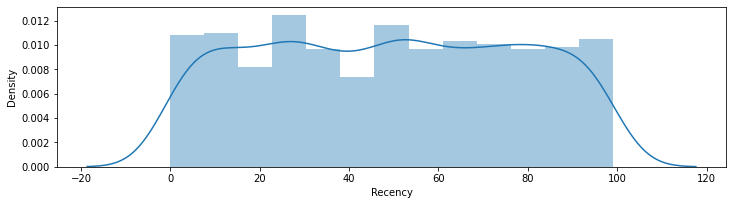

In [ ]:
#Plot of recency
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
plt.show()

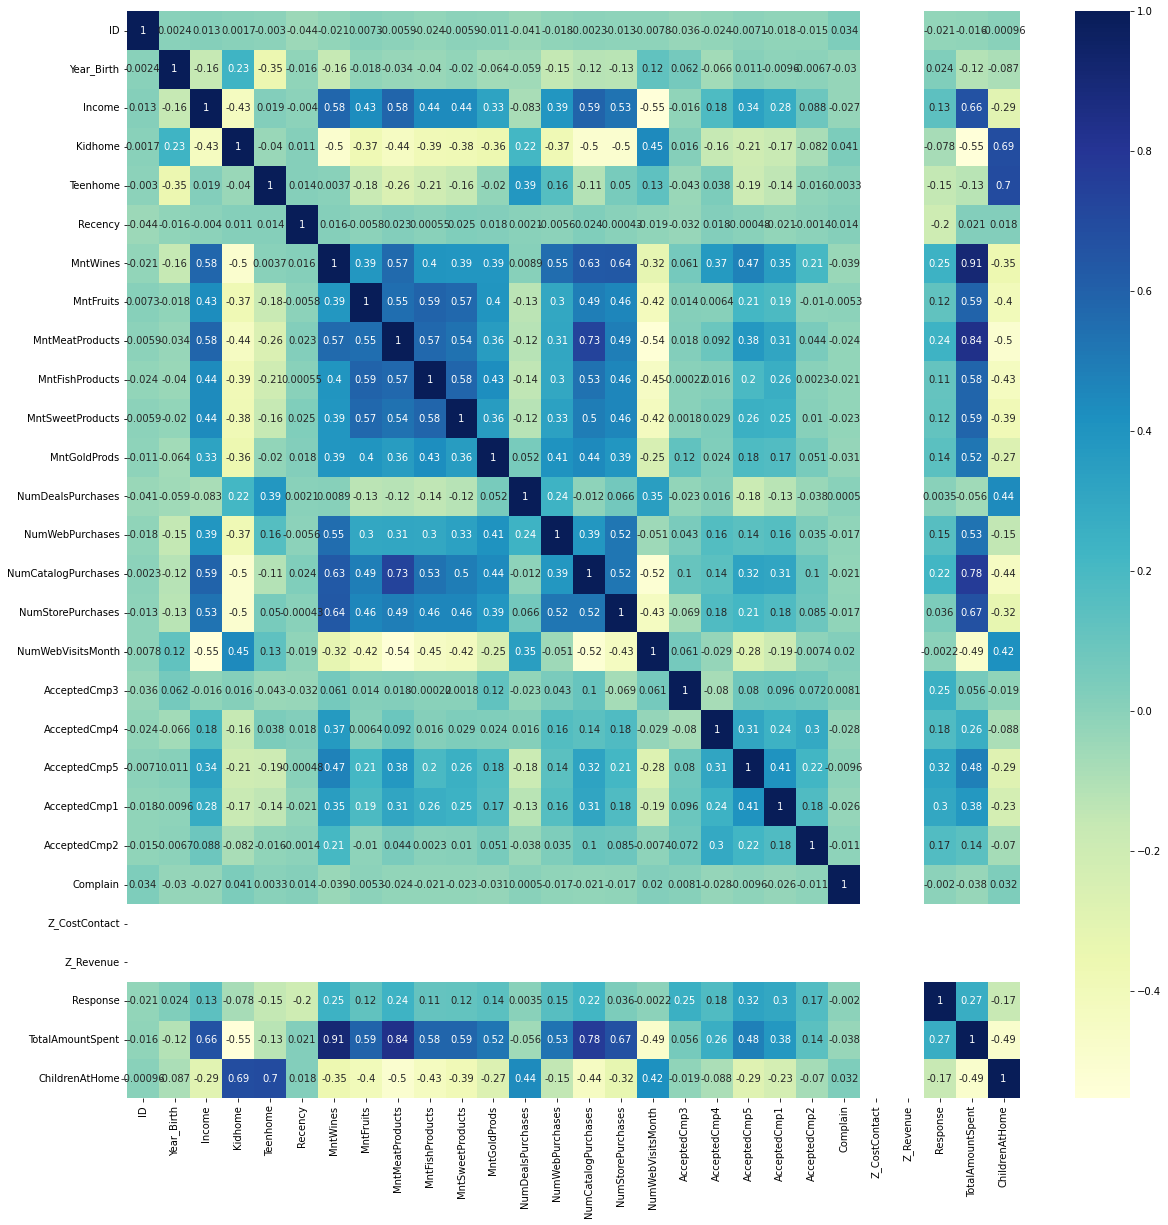

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))  
fig = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df['Age'] = 2021 - df['Year_Birth']
df

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,TotalAmountSpent,ChildrenAtHome,Children,Income_tier,Total_tier,Customer_Tier,Age,TotalNumPurchases,Avg_Spent_PP
0,5524,1957,1.0,0,58138.0,0,0,4/9/2012,58,635,...,1,1445,0,0,3,5,0,64,25,57.80
1,2174,1954,1.0,0,46344.0,1,1,8/3/2014,38,11,...,0,25,2,1,3,1,0,67,6,4.17
2,4141,1965,1.0,1,71613.0,0,0,21-08-2013,26,426,...,0,665,0,0,4,3,0,56,21,31.67
3,6182,1984,1.0,1,26646.0,1,0,10/2/2014,26,11,...,0,43,1,1,2,1,0,37,8,5.38
4,5324,1981,1.0,1,58293.0,1,0,19-01-2014,94,173,...,0,376,1,1,3,2,0,40,19,19.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1.0,1,61223.0,0,1,13-06-2013,46,709,...,0,1299,1,1,3,5,0,54,18,72.17
2236,4001,1946,1.0,1,64014.0,2,1,10/6/2014,56,406,...,0,444,3,1,3,3,0,75,22,20.18
2237,7270,1981,1.0,0,56981.0,0,0,25-01-2014,91,908,...,0,1209,0,0,3,5,0,40,19,63.63
2238,8235,1956,1.0,1,69245.0,0,1,24-01-2014,8,428,...,0,763,1,1,3,4,0,65,23,33.17


In [ ]:
df['Education'] = df['Education'].astype(np.float64)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='TotalAmountSpent'>

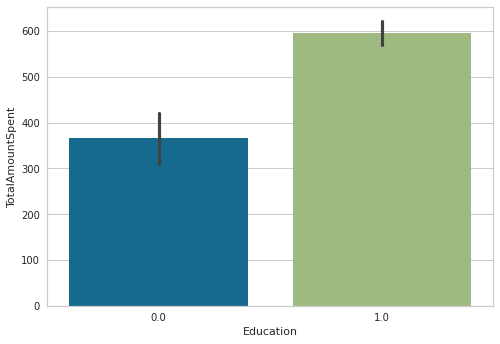

In [ ]:
sns.barplot(df['Education'],df['TotalAmountSpent'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Income_tier', ylabel='TotalAmountSpent'>

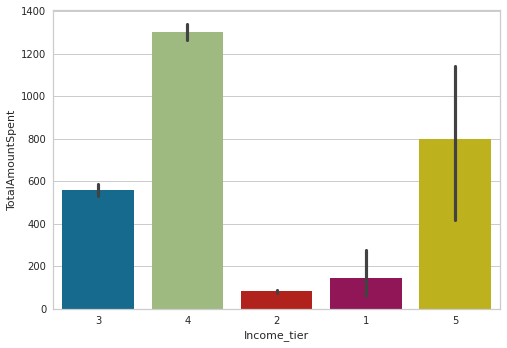

In [ ]:
sns.barplot(df['Income_tier'],df['TotalAmountSpent'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Children', ylabel='TotalAmountSpent'>

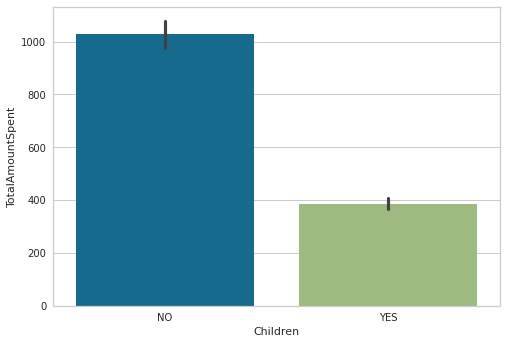

In [ ]:
sns.barplot(df['Children'],df['TotalAmountSpent'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital_Status', ylabel='TotalAmountSpent'>

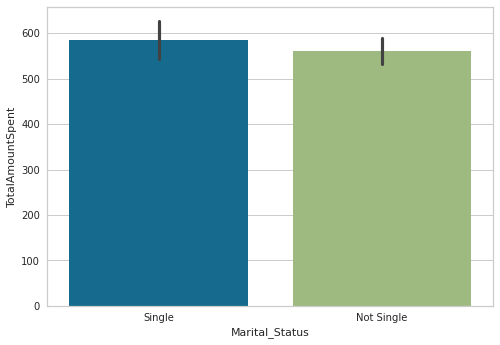

In [ ]:
sns.barplot(df['Marital_Status'],df['TotalAmountSpent'])

In [ ]:
del_cols = ['ID', 'Avg_Spent_PP', 'Year_Birth', 'Income','Dt_Customer','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = df.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
ds.isna().sum()
ds

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Z_Revenue,TotalAmountSpent,ChildrenAtHome,Children,Income_tier,Total_tier,Customer_Tier,Age,TotalNumPurchases,Avg_Spent_PP
0,1.0,0,0,0,58,88,88,3,8,10,...,11,1445,0,0,3,5,0,64,25,57.80
1,1.0,0,1,1,38,1,6,2,1,1,...,11,25,2,1,3,1,0,67,6,4.17
2,1.0,1,0,0,26,21,42,1,8,2,...,11,665,0,0,4,3,0,56,21,31.67
3,1.0,1,1,0,26,3,5,2,2,0,...,11,43,1,1,2,1,0,37,8,5.38
4,1.0,1,1,0,94,27,15,5,5,3,...,11,376,1,1,3,2,0,40,19,19.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.0,1,0,1,46,118,247,2,9,3,...,11,1299,1,1,3,5,0,54,18,72.17
2236,1.0,1,2,1,56,0,8,7,8,2,...,11,444,3,1,3,3,0,75,22,20.18
2237,1.0,0,0,0,91,12,24,1,2,3,...,11,1209,0,0,3,5,0,40,19,63.63
2238,1.0,1,0,1,8,30,61,2,6,5,...,11,763,1,1,3,4,0,65,23,33.17


In [ ]:
ds['Total_tier'] = ds['Total_tier'].astype(str).astype(int)
ds['Income_tier'] = ds['Income_tier'].astype(str).astype(int)

In [ ]:
# Subset of df dataframe: Dimension reduction for desired predictors
ds_sub = ds[['Total_tier','Education','Marital_Status',
             'Children','Income_tier','TotalNumPurchases']]
ds_sub.head()


,Total_tier,Education,Marital_Status,Children,Income_tier,TotalNumPurchases
0,5,1.0,0,0,3,25
1,1,1.0,0,1,3,6
2,3,1.0,1,0,4,21
3,1,1.0,1,1,2,8
4,2,1.0,1,1,3,19


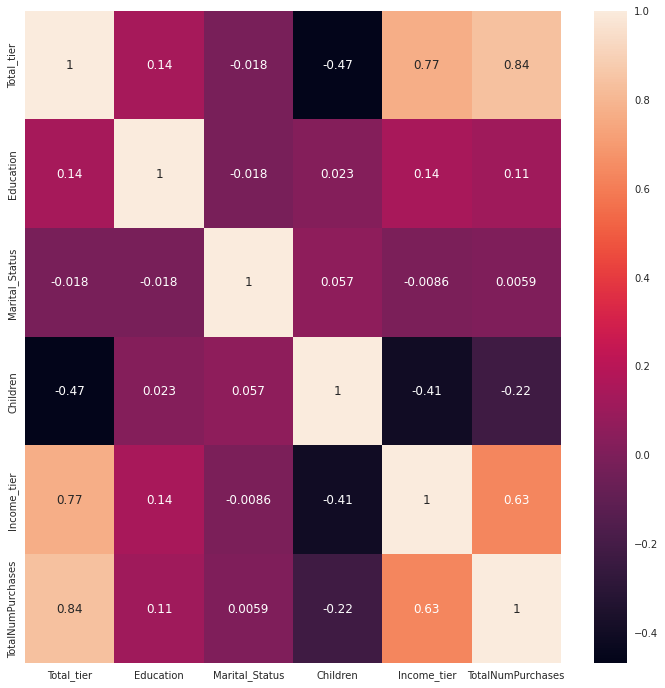

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(ds_sub.corr(), annot=True)
plt.show()

As initially thought, Education is not correlated with the total amount spent per purchase. Alternatively, the number of children is negatively correlated with the total amount spent per purchase. Initial thoughts were those with children would be more likely to shop at our store. This is not the case, it seems that those with children are not likely to spend at the store.

In [ ]:
pca = PCA(n_components=4)
pca.fit(ds_sub)
PCA_df = pd.DataFrame(pca.transform(ds_sub), columns=(["Education","Income_tier", "Children", "Marital_Status"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,-6.412841e-17,7.803490,-15.051466,-7.129755,0.343482,6.310720,29.151386
Income_tier,2216.0,-2.885778e-17,0.972064,-3.250202,-0.458838,0.166487,0.633448,4.102721
Children,2216.0,-7.855730e-17,0.479768,-1.000394,-0.369349,-0.282401,0.576591,1.079688
Marital_Status,2216.0,1.484973e-16,0.456089,-2.047716,-0.263050,-0.014392,0.297916,2.429915


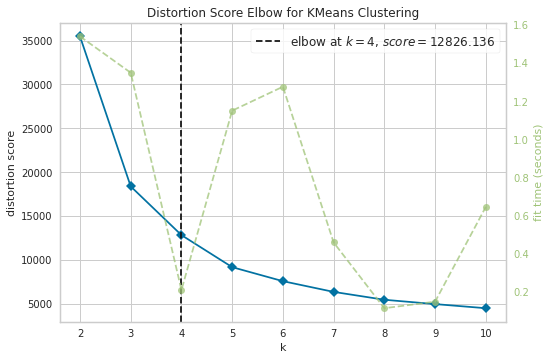

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_df)  
visualizer.show()

In [ ]:
predictors = ds_sub
predictors = predictors.drop(columns = ['Total_tier'])

X = predictors
Y = df['Total_tier']
train_X, valid_X, train_Y, valid_Y = train_test_split(X,Y, test_size = .4, random_state = 1)


In [ ]:
X

,Education,Marital_Status,Children,Income_tier,TotalNumPurchases
0,1.0,0,0,3,25
1,1.0,0,1,3,6
2,1.0,1,0,4,21
3,1.0,1,1,2,8
4,1.0,1,1,3,19
...,...,...,...,...,...
2235,1.0,1,1,3,18
2236,1.0,1,1,3,22
2237,1.0,0,0,3,19
2238,1.0,1,1,3,23


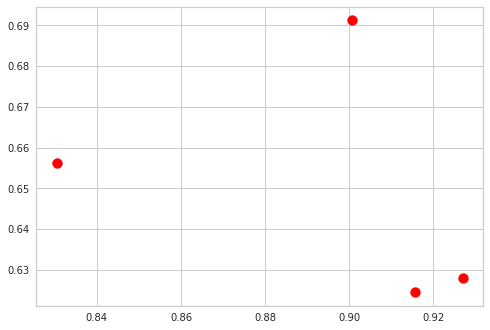

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init= 10, random_state = 0)
pred_y = kmeans.fit_predict(X)
#plt.scatter(X[:,0], c=Y, s=25, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.show()

In [ ]:
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(PCA_df)
PCA_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MP_df

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ds_sub['Clusters'] = df['Clusters']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


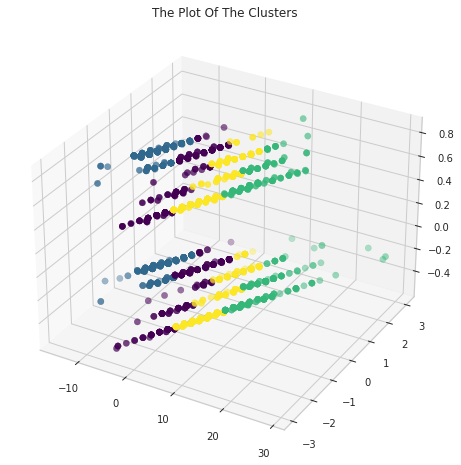

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

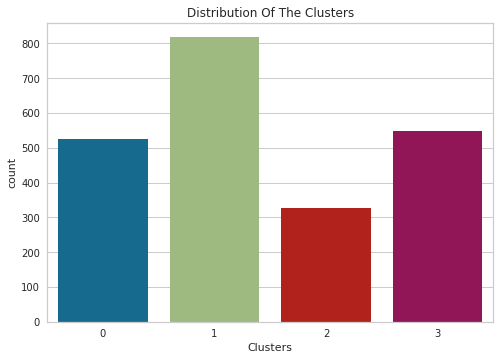

In [ ]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


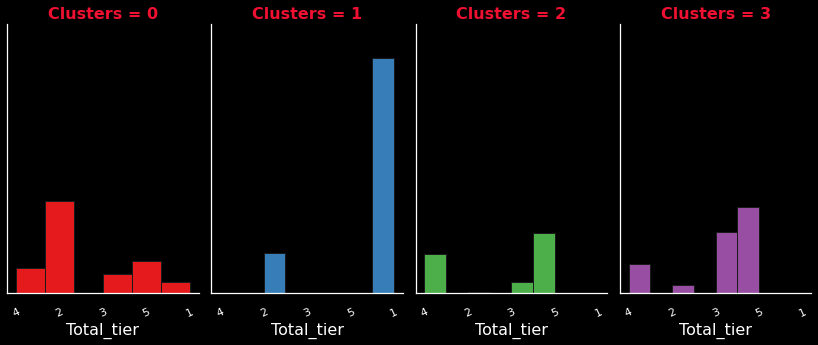

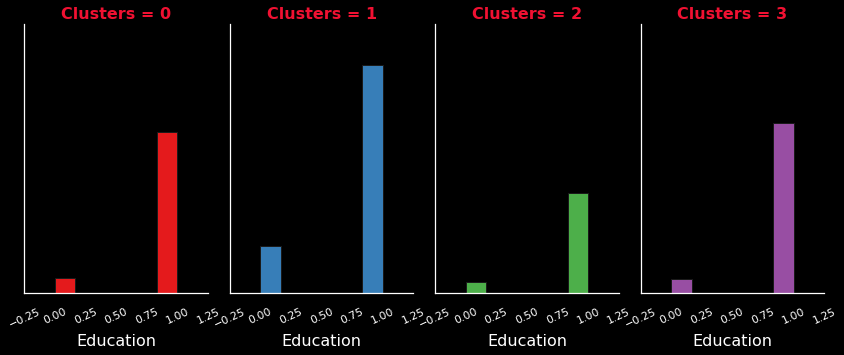

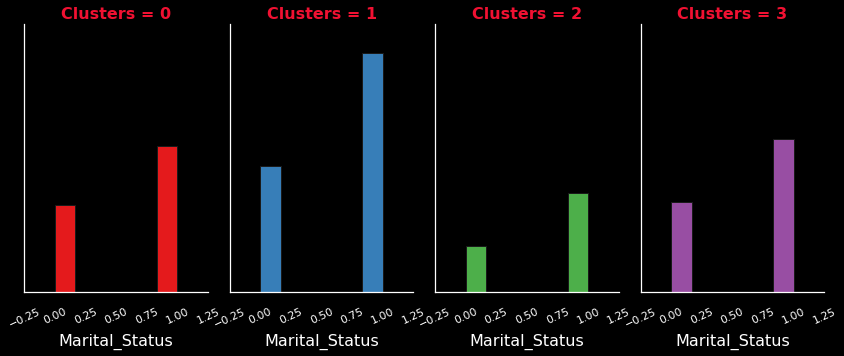

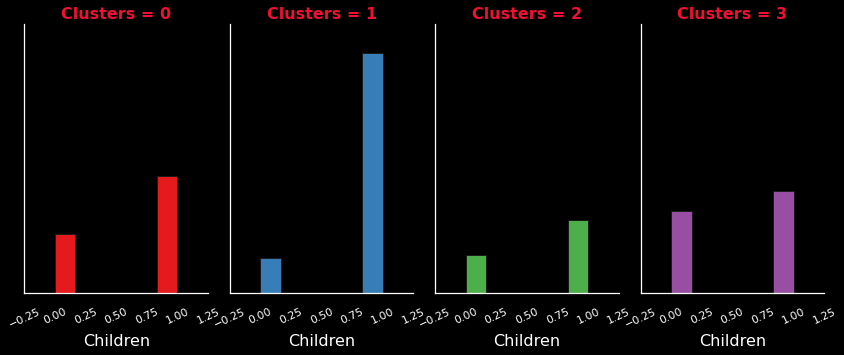

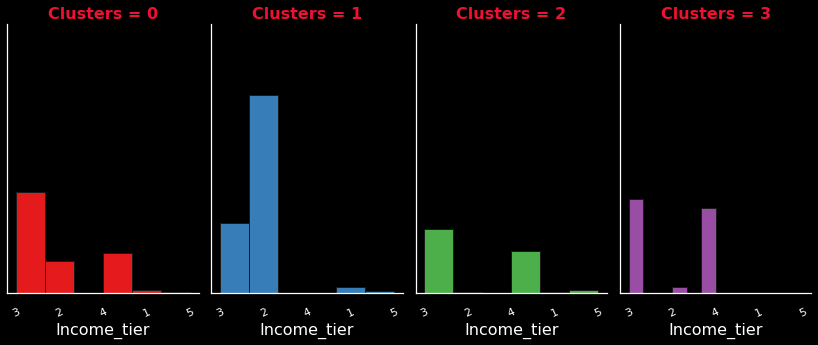

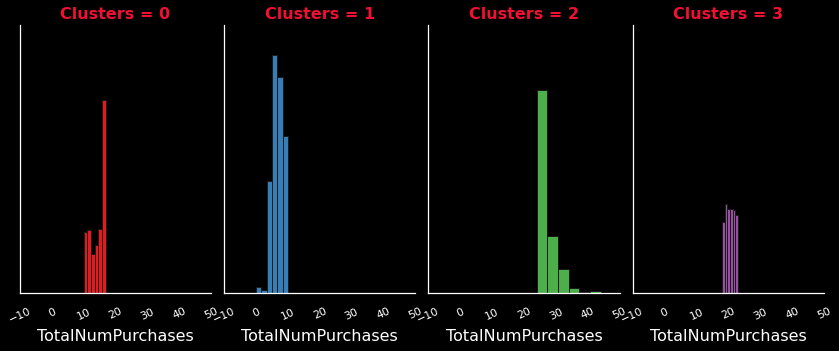

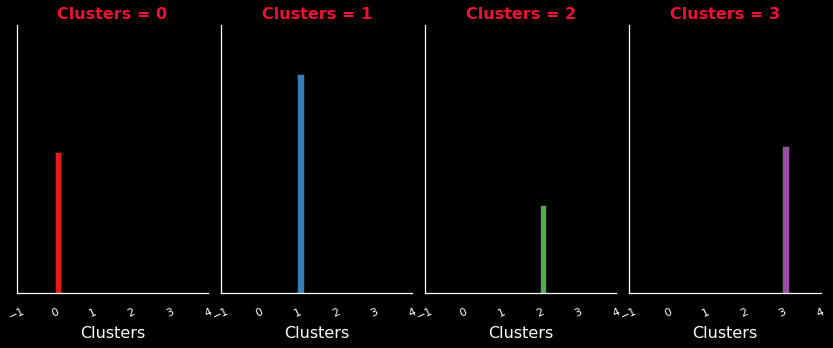

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in ds_sub:
    diag = sns.FacetGrid(df, col = "Clusters", hue = "Clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

In [ ]:
# Model 1: Logistic Regression
logreg = LogisticRegressionCV(penalty = "l2", solver = 'saga', cv =5)
logreg.fit(train_X, train_Y)
classificationSummary(train_Y, logreg.predict(train_X))
classificationSummary(valid_Y, logreg.predict(valid_X))


no display found. Using non-interactive Agg backend
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge


In [ ]:
ds_sub.head()

,Total_tier,Education,Marital_Status,Children,Income_tier,TotalNumPurchases,Clusters
0,5,1.0,0,0,3,25,2
1,1,1.0,0,1,3,6,1
2,3,1.0,1,0,4,21,3
3,1,1.0,1,1,2,8,1
4,2,1.0,1,1,3,19,3


In [ ]:

#kmeans
points = ds_sub
kmeans3 = cluster.KMeans(n_clusters=4, random_state=0).fit(points)
ds_sub['cluster'] = kmeans3.labels_

centroids = kmeans3.cluster_centers_
dists = pd.DataFrame(    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=ds_sub.index)
df_km = pd.concat([ds_sub, dists], axis=1)
print(df_km)

      Total_tier  Education  Marital_Status  Children  Income_tier  \
0              5        1.0               0         0            3   
1              1        1.0               0         1            3   
2              3        1.0               1         0            4   
3              1        1.0               1         1            2   
4              2        1.0               1         1            3   
...          ...        ...             ...       ...          ...   
2235           5        1.0               1         1            3   
2236           3        1.0               1         1            3   
2237           5        1.0               0         0            3   
2238           4        1.0               1         1            3   
2239           2        1.0               1         1            3   

      TotalNumPurchases  Clusters  cluster     dist_0     dist_1     dist_2  \
0                    25         2        1  11.038897   2.211104  18.892144   
1

In [ ]:
# Model 1: Logistic Regression
logreg = LogisticRegressionCV(penalty = "l2", solver = 'saga', cv =5)
logreg.fit(train_X, train_Y)

logpred = logreg.predict(valid_X)
classificationSummary(train_Y, logreg.predict(train_X))
classificationSummary(valid_Y, logreg.predict(valid_X))

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/shared-libs/python3.7/py/lib/

In [ ]:
# Model 2: Naive Bayes
nb = GaussianNB()
nb.fit(train_X, train_Y)

nbpred = nb.predict(valid_X)
classificationSummary(train_Y, nb.predict(train_X))
classificationSummary(valid_Y, nb.predict(valid_X))

Confusion Matrix (Accuracy 0.7291)

       Prediction
Actual   0   1   2   3   4
     0 400  22   0   0   0
     1  52 171  23   2   7
     2   0  21 124   7  24
     3   0   8  53  30  75
     4   0   2  31  33 244
Confusion Matrix (Accuracy 0.7249)

       Prediction
Actual   0   1   2   3   4
     0 293  13   0   0   4
     1  28 110  19   1   3
     2   0  11  60   4  17
     3   0   9  39  18  42
     4   0   1  21  32 162


In [ ]:
# Model 3: SVM
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y)
y_pred1 = clf.predict(valid_X)
classificationSummary(train_Y, clf.predict(train_X))
classificationSummary(valid_Y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.7299)

       Prediction
Actual   0   1   2   3   4
     0 399  23   0   0   0
     1  49 184  18   3   1
     2   0  25 121  14  16
     3   0  16  43  46  61
     4   0   6  26  58 220
Confusion Matrix (Accuracy 0.7159)

       Prediction
Actual   0   1   2   3   4
     0 293  16   0   0   1
     1  26 113  19   1   2
     2   0  10  53  14  15
     3   0  14  30  33  31
     4   0   7  22  44 143


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

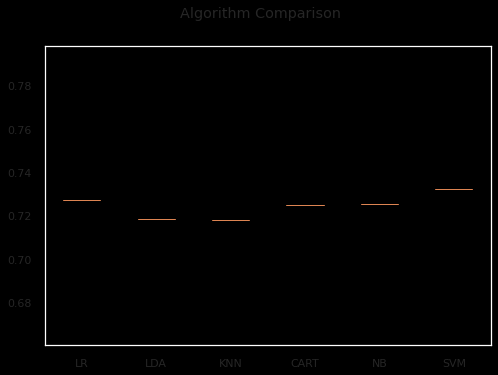

In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Set Seed
seed = 7
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Out of the 7 models we've run (Logistic Regression, LDA, K-Nearest Neighbors, CART, Naive Bayes, and SVM), all achieved roughly the same accuracy, our metric for performance.
#### With that being said, the Naive Bayes algorithm achieved an accuracy of 73.1% followed closely by SVM at 73.0%.
#### The results of our model indicates which demographic should be targetted with respect to education levels, parenthood, income, marital status, and spending habits to increase sales.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f53e289-11a0-485c-a8a6-4bbdf1e93e63' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>